# 01. Importing libraries

In [8]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
import requests
import json
from datetime import datetime
import zipfile
import chardet
from scipy.signal import find_peaks

# 02. Loading the file from Exercise 2.2

In [9]:
file_path = '/Users/renubalaji/Documents/GitHubProjects/Bike_rental_2018/merged_data_new.csv'

In [10]:
# Read in the CSV file
final_data = pd.read_csv(file_path)

In [11]:
# Print the first few rows to verify the data was loaded successfully
print(final_data.head())

    trip_id     start_time       end_time  bikeid tripduration  \
0  17536702  01/01/18 0:12  01/01/18 0:17    3304          323   
1  17536703  01/01/18 0:41  01/01/18 0:47    5367          377   
2  17536704  01/01/18 0:44  01/01/18 1:33    4599     2,904.00   
3  17536705  01/01/18 0:53  01/01/18 1:05    2302          747   
4  17536706  01/01/18 0:53  01/01/18 0:56    3696          183   

   from_station_id            from_station_name  to_station_id  \
0               69       Damen Ave & Pierce Ave            159   
1              253  Winthrop Ave & Lawrence Ave            325   
2               98   LaSalle St & Washington St            509   
3              125         Rush St & Hubbard St            364   
4              129    Blue Island Ave & 18th St            205   

                  to_station_name    usertype gender  birthyear        date  \
0       Claremont Ave & Hirsch St  Subscriber   Male     1988.0  2018-01-01   
1  Clark St & Winnemac Ave (Temp)  Subscriber   

# 03. Using seaborn

<AxesSubplot: >

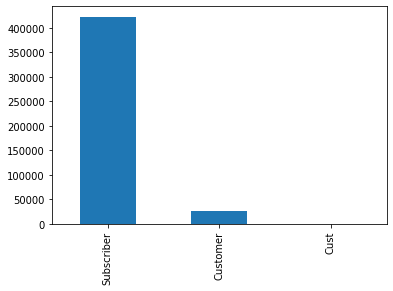

In [12]:
final_data['usertype'].value_counts().plot(kind = 'bar')

<AxesSubplot: xlabel='usertype', ylabel='count'>

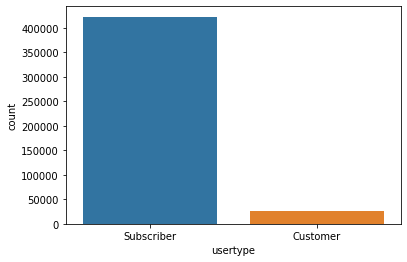

In [15]:
# Replace 'Cust' with 'Customer' in the 'usertype' column
final_data['usertype'] = final_data['usertype'].replace({'Cust': 'Customer'})

# Now plot again
sns.countplot(data=final_data, x='usertype')

# 04. Bar chart

In [17]:
final_data['value'] = 1
df_t = final_data.groupby('from_station_name')['value'].count().reset_index()

In [18]:
top20 = df_t.nlargest(20, 'value')
top20

,from_station_name,value
78,Canal St & Adams St,9916
139,Clinton St & Washington Blvd,8807
135,Clinton St & Madison St,7252
288,Kingsbury St & Kinzie St,5564
81,Canal St & Madison St,5521
141,Columbus Dr & Randolph St,4986
367,Michigan Ave & Washington St,4957
224,Franklin St & Monroe St,4232
314,Larrabee St & Kingsbury St,4211
134,Clinton St & Lake St,4088


<AxesSubplot: xlabel='value', ylabel='from_station_name'>

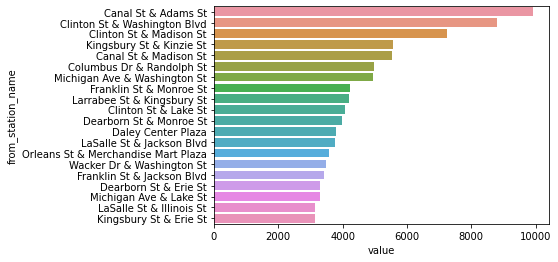

In [20]:
sns.barplot(data = top20, x = 'value', y = 'from_station_name')

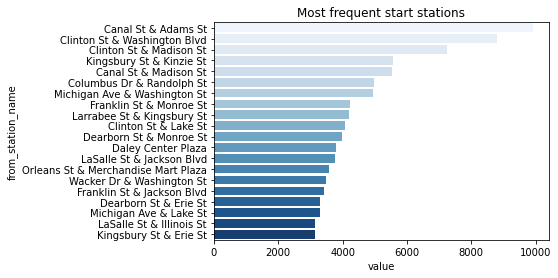

In [21]:
sns.barplot(data = top20, x = 'value', y = 'from_station_name', palette=("Blues")) 
plt.title("Most frequent start stations")
plt.show()

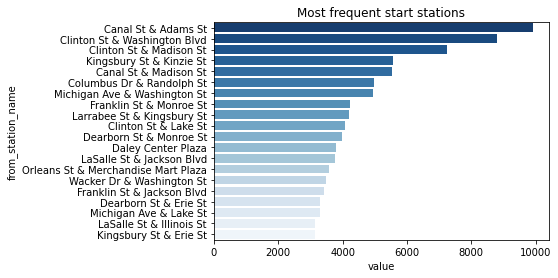

In [24]:
sns.barplot(data=top20, x='value', y='from_station_name', palette="Blues_r")
plt.title("Most frequent start stations")
plt.show()

In [32]:
# Group by 'date' to calculate daily total bike rides
daily_rides = final_data.groupby('date')['value'].sum().reset_index()

# Rename the columns for clarity
daily_rides.columns = ['date', 'bike_rides_daily']

In [34]:
from scipy.signal import find_peaks

# Identify the peaks in 'bike_rides_daily'
peaks, _ = find_peaks(daily_rides['bike_rides_daily'])

# Get the corresponding peak dates
peak_dates = daily_rides.loc[peaks, 'date']
peak_values = daily_rides.loc[peaks, 'bike_rides_daily']

print(peak_dates)  # This will print the dates of the peaks

1      2018-01-02
10     2018-01-19
13     2018-01-22
17     2018-01-26
22     2018-01-31
26     2018-02-04
29     2018-02-15
36     2018-02-22
41     2018-02-27
45     2018-03-03
49     2018-03-15
52     2018-03-18
56     2018-03-22
60     2018-03-26
62     2018-03-28
64     2018-03-30
69     2018-04-04
73     2018-05-04
77     2018-06-04
80     2018-07-03
82     2018-08-01
84     2018-08-03
86     2018-09-01
88     2018-09-03
90     2018-10-01
93     2018-10-04
97     2018-11-04
100    2018-12-03
Name: date, dtype: object


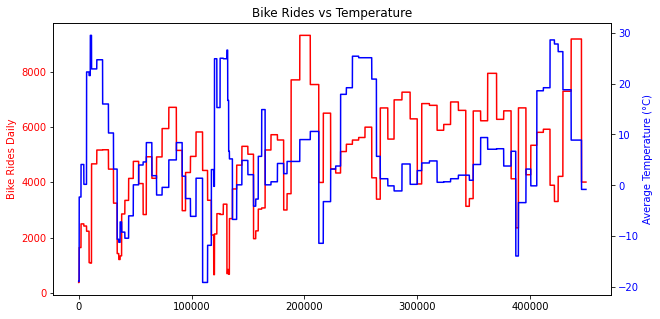

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot bike rides daily on the left y-axis
ax.plot(df['bike_rides_daily'], color="red", label='Bike Rides Daily')
ax.set_ylabel('Bike Rides Daily', color='red')
ax.tick_params(axis='y', labelcolor='red')

# Create a second y-axis to plot temperature
ax2 = ax.twinx()
ax2.plot(df['avgTemp'], color="blue", label='Average Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Set the title
plt.title('Bike Rides vs Temperature')

plt.show()

# 05. Box plots

In [37]:
print(final_data.columns)

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'date', 'avgTemp',
       'value'],
      dtype='object')


In [40]:
# Calculate age
final_data['age'] = 2024 - final_data['birthyear']

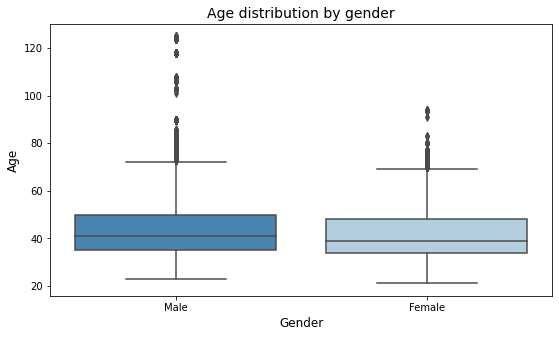

In [41]:
plt.figure(figsize=(9, 5))

# Create the boxplot with the calculated 'age' column
sns.boxplot(x='gender', y='age', data=final_data, palette="Blues_r")

plt.xlabel('Gender', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Age distribution by gender', fontsize=14)
plt.show()

<AxesSubplot: xlabel='gender', ylabel='age'>

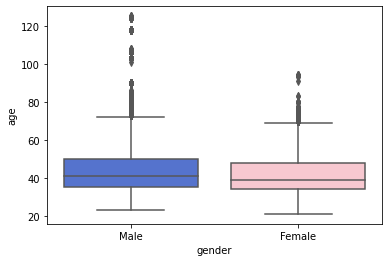

In [43]:
sns.boxplot(x = 'gender', y = 'age', data = final_data, palette = {'Male': 'royalblue', 'Female': 'pink'})

<AxesSubplot: xlabel='gender', ylabel='age'>

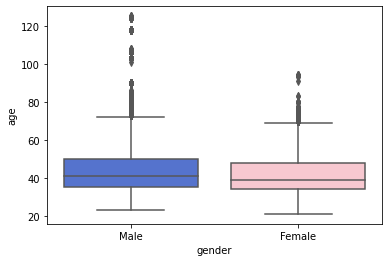

In [44]:
my_colors = {'Male': 'royalblue', 'Female': 'pink'}
sns.boxplot(x = 'gender', y = 'age', data = final_data, palette = my_colors)

In the box plot of age distribution by gender, we see two box plots: one for males and one for females. Here's the interpretation:

Median Age: Both genders have a median age around 40, as indicated by the middle line in each box. This suggests that the typical age for both male and female users is similar, centered around 40 years.

Interquartile Range (IQR): The boxes represent the IQR, which is the range where the middle 50% of the data lies. Both genders show a similar IQR, with most users being between about 30 and 50 years old. This suggests that the ages of both male and female users are relatively concentrated within this age range.

Outliers: Both genders show a number of outliers (dots above the whiskers), particularly at older ages (above 60). This indicates that while most users fall in a typical age range, there are some much older users, especially above 80 years of age.

Whiskers: The whiskers extend further for males compared to females, indicating that males have a broader age distribution, with some users as old as around 80 before reaching the outlier zone. Females, on the other hand, have a more concentrated age distribution, with the upper whisker reaching approximately 60-65 years.

# 06. Violin Plots

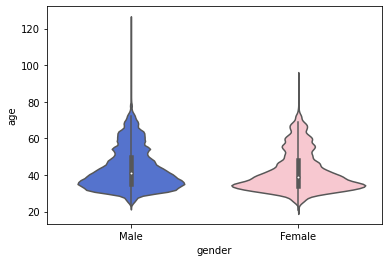

In [46]:
sns.violinplot(x = 'gender', y = 'age', data = final_data, palette = {'Male': 'royalblue', 'Female': 'pink'})
plt.show()

# 07. Strip Plots

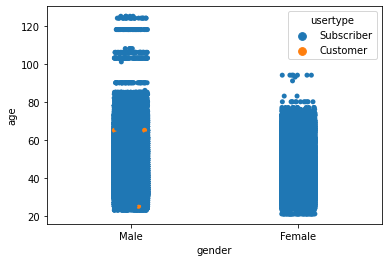

In [48]:
sns.stripplot(x = 'gender', y = 'age', data = final_data, hue = 'usertype')
plt.show()

# 08. FacetGrids

/Users/renubalaji/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/renubalaji/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


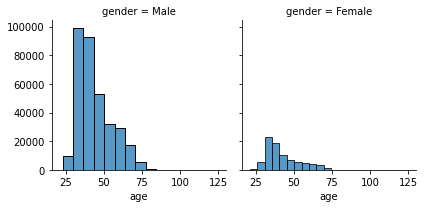

In [50]:
grid = sns.FacetGrid(final_data, col = "gender")
grid.map(sns.histplot, "age", bins = 15)

/Users/renubalaji/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/renubalaji/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


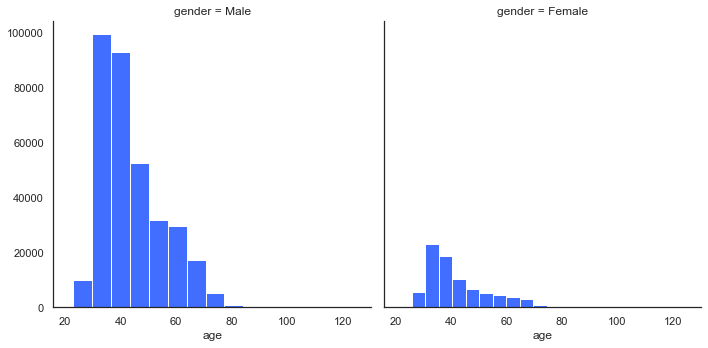

In [61]:
# Create a FacetGrid for age distribution by gender
g = sns.FacetGrid(final_data, col="gender", height=5, aspect=1)
g.map(sns.histplot, 'age', bins=15)

# Display the plots
plt.show()

This plot will help visualize how the age distribution differs between genders. It looks like the distribution for males peaks around the age of 40, while females show a lower overall count across ages but a similar age peak. This insight can help in understanding demographic patterns, which might indicate the age and gender most frequently using the service, potentially useful for targeted marketing or service design.

<Figure size 648x360 with 0 Axes>

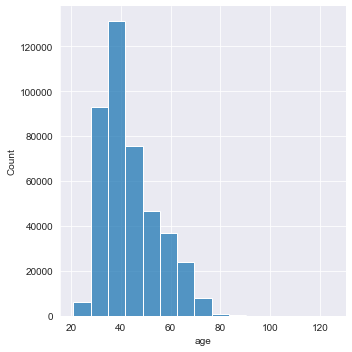

In [52]:
sns.set_style('darkgrid')
plt.figure(figsize=(9,5))
sns.displot(final_data['age'], bins = 15)
plt.show()

In [53]:
sns.set_style("dark")
sns.set_palette('PuRd_r')

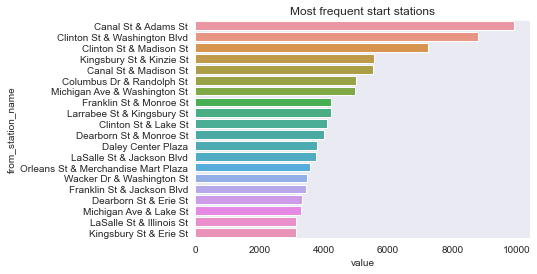

In [54]:
sns.set_palette('PuRd_r')
sns.barplot(data = top20, x = 'value', y = 'from_station_name')
plt.title("Most frequent start stations")
plt.show()

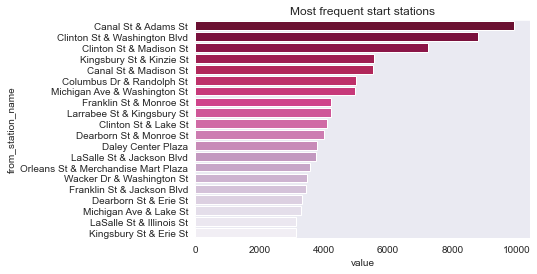

In [55]:
sns.set_palette('PuRd_r', n_colors = 20)
sns.barplot(data = top20, x = 'value', y = 'from_station_name')
plt.title("Most frequent start stations")
plt.show()

In [63]:
# Check the data type of the 'tripduration' column
print(final_data['tripduration'].dtype)

object


In [64]:
# If it's not numeric, convert it
final_data['tripduration'] = pd.to_numeric(final_data['tripduration'], errors='coerce')

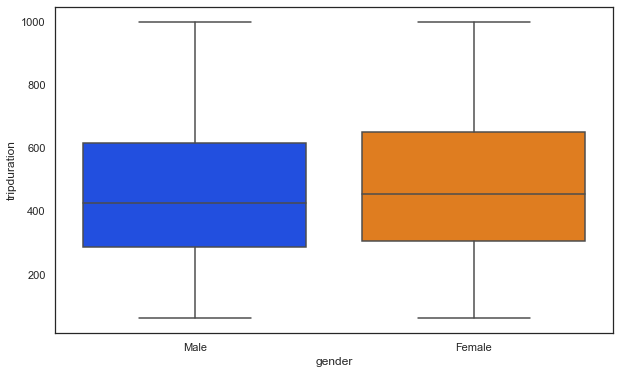

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='tripduration', data=final_data)
plt.show()